# Part 4.1: Training Dataset Preparation

In this part, we will select, scale and check the variables we want to use in the training eventually.



## Preprocess

In [1]:
# How many days in advance should the forecasting be made? (1,3,7 is supported with ECMWF comparison)
lead_day=1
# Create input variables with lagged dates (these lags are relative to the shifted lead day, 
#.                                          that is, 1 day lag is always 1 day before *selected* target)
lags = [1,3,5]

# Read-in the water level dataset and check the content
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
%matplotlib inline
import netCDF4 as nc
from matplotlib.dates import DateFormatter
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
INF_str = "/Users/oncel/Documents/Projects/KoelnPegelML/training_datasets/"


## Input Preprocessing

In [2]:
# Read-in the pegel training dataset from Part 1&2:
df_pegel = pd.read_csv(INF_str+"train_pegels_area_preprocessed.csv", index_col=0, parse_dates=True)
print(df_pegel.columns.tolist())

# Check if static subbasin areas are there!

['Kln_h', 'Fra_h', 'Fra_diff', 'Ruw_h', 'Ruw_diff', 'Klk_h', 'Klk_diff', 'Rhw_h', 'Rhw_diff', 'Kau_h', 'Kau_diff', 'Bng_h', 'Bng_diff', 'Sie_h', 'Sie_diff', 'Stg_h', 'Stg_diff', 'Ahr_h', 'Ahr_diff', 'Hdb_h', 'Hdb_diff', 'sbs_area_0', 'sbs_area_1', 'sbs_area_2', 'sbs_area_3', 'sbs_area_4', 'sbs_area_5', 'sbs_area_6', 'sbs_area_7', 'sbs_area_8', 'sbs_area_9', 'sbs_area_10', 'sbs_area_11']


In [3]:
# Read-in the precip training dataset from Part 3.1:
df_precip = pd.read_csv(INF_str+"train_precip_preprocessed.csv", index_col=0, parse_dates=True)
print(df_precip.columns.tolist())

['sbs_prep_1', 'sbs_prep_3', 'sbs_prep_4', 'sbs_prep_5', 'sbs_prep_6', 'sbs_prep_7', 'sbs_prep_9', 'sbs_prep_10', 'sbs_prep_11']


In [4]:
# Read-in the humidity training dataset from Part 3.2:
df_humd = pd.read_csv(INF_str+"train_humd_preprocessed.csv", index_col=0, parse_dates=True)
print(df_humd.columns.tolist())

['sbs_humd_1', 'sbs_humd_3', 'sbs_humd_4', 'sbs_humd_5', 'sbs_humd_6', 'sbs_humd_7', 'sbs_humd_9', 'sbs_humd_10', 'sbs_humd_11']


In [5]:
# Read-in the radiation training dataset from Part 3.3:
df_rad = pd.read_csv(INF_str+"train_rad_preprocessed.csv", index_col=0, parse_dates=True)
print(df_rad.columns.tolist())

['sbs_rad_1', 'sbs_rad_3', 'sbs_rad_4', 'sbs_rad_5', 'sbs_rad_6', 'sbs_rad_7', 'sbs_rad_9', 'sbs_rad_10', 'sbs_rad_11']


In [6]:
# Read-in the mean temp training dataset from Part 3.4:
df_tg = pd.read_csv(INF_str+"train_temp_preprocessed.csv", index_col=0, parse_dates=True)
print(df_tg.columns.tolist())

['sbs_temp_1', 'sbs_temp_3', 'sbs_temp_4', 'sbs_temp_5', 'sbs_temp_6', 'sbs_temp_7', 'sbs_temp_9', 'sbs_temp_10', 'sbs_temp_11']


In [7]:
# Read-in the snow cover training dataset from Part 3.5:
df_sc = pd.read_csv(INF_str+"train_snow_preprocessed.csv", index_col=0, parse_dates=True)
print(df_sc.columns.tolist())

['sbs_snow_oberrhein', 'sbs_snow_neckar', 'sbs_snow_alps']


In [8]:
# Read-in the precip training dataset from Part 3.1:
#df_combined = pd.concat([df_pegel,df_areas, df_precip, df_humd, df_rad, df_tg, df_sc], axis=1)
df_combined = pd.concat([df_pegel, df_precip, df_humd, df_rad, df_tg, df_sc], axis=1)
df_combined

,Kln_h,Fra_h,Fra_diff,Ruw_h,Ruw_diff,Klk_h,Klk_diff,Rhw_h,Rhw_diff,Kau_h,...,sbs_temp_4,sbs_temp_5,sbs_temp_6,sbs_temp_7,sbs_temp_9,sbs_temp_10,sbs_temp_11,sbs_snow_oberrhein,sbs_snow_neckar,sbs_snow_alps
1995-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.028219,0.295763,1.486286,1.021706,-0.090952,-2.040773,-2.175669,NaN,NaN,NaN
1995-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.312877,-1.200367,0.690571,-1.098135,-1.485655,-6.155555,-5.897807,NaN,NaN,NaN
1995-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.507603,-3.363079,-0.232857,-2.630555,-3.107321,-6.982367,-7.250481,NaN,NaN,NaN
1995-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.602534,-7.461723,-4.596286,-5.928174,-7.955833,-10.547101,-10.435080,NaN,NaN,NaN
1995-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-9.152191,-9.642090,-6.784571,-8.425794,-9.688334,-12.492898,-12.139251,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30,224.729167,158.489583,1.218750,225.364583,2.614583,180.635417,-2.375000,222.156250,6.427083,196.437500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-08-31,251.989583,157.322917,-1.166667,223.437500,-1.927083,176.916667,-3.718750,221.760417,-0.395833,221.260417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-09-01,275.406250,155.510417,-1.812500,228.864583,5.427083,175.802083,-1.114583,220.604167,-1.156250,216.104167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-09-02,273.270833,156.729167,1.218750,225.583333,-3.281250,175.020833,-0.781250,216.364583,-4.239583,200.958333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop rows where any column NaNn
df_all = df_combined.dropna(how="any")

In [10]:
# Remove further variables for studies
#df_all = df_all.drop(columns=df_all.filter(regex="Fra_|Hdb_|Ruw_|Rhw_|Klk_").columns)

In [11]:
df_all

,Kln_h,Fra_h,Fra_diff,Ruw_h,Ruw_diff,Klk_h,Klk_diff,Rhw_h,Rhw_diff,Kau_h,...,sbs_temp_4,sbs_temp_5,sbs_temp_6,sbs_temp_7,sbs_temp_9,sbs_temp_10,sbs_temp_11,sbs_snow_oberrhein,sbs_snow_neckar,sbs_snow_alps
2000-01-02,599.583333,185.875000,-9.907609,388.468750,-27.313859,289.833333,-13.003623,162.687500,-1.008152,401.260417,...,1.935411,1.575424,1.597429,2.606032,1.549464,-0.915652,-0.931069,12.608696,4.89,15.209302
2000-01-03,554.885417,185.854167,-0.020833,361.312500,-27.156250,281.895833,-7.937500,164.416667,1.729167,367.989583,...,2.707945,1.485226,3.301714,1.556984,0.138214,-1.550048,-1.672995,11.456522,3.73,13.465116
2000-01-04,517.239583,181.718750,-4.135417,341.687500,-19.625000,276.354167,-5.541667,165.333333,0.916667,346.093750,...,5.338561,4.248107,6.812571,5.442817,4.293155,-1.513140,-0.454225,10.358696,3.14,12.627907
2000-01-05,495.114583,179.125000,-2.593750,340.864583,-0.822917,308.843750,32.489583,165.770833,0.437500,327.968750,...,3.320890,2.454859,4.812571,5.033333,3.799643,1.194638,1.515615,8.500000,1.98,10.325581
2000-01-06,480.500000,180.947917,1.822917,324.427083,-16.437500,320.489583,11.645833,165.343750,-0.427083,311.135417,...,3.750000,1.706525,3.792286,3.504325,1.378810,-0.112415,0.175989,7.456522,1.49,8.534884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,526.739583,179.333333,-7.343750,307.072917,-60.072917,289.385417,-32.187500,208.593750,-17.395833,384.572917,...,-0.544658,0.635395,-1.020571,-0.646944,-1.470714,-0.679614,-1.629144,0.565217,0.00,0.440000
2018-12-28,492.197917,171.187500,-8.145833,272.541667,-34.531250,259.239583,-30.145833,205.052083,-3.541667,339.822917,...,-1.198562,-0.543644,-0.717143,-0.054087,-0.851310,-0.488019,-0.410267,0.565217,0.00,0.440000
2018-12-29,427.062500,164.239583,-6.947917,264.197917,-8.343750,239.822917,-19.416667,205.010417,-0.041667,287.895833,...,0.774110,0.226017,1.168000,0.439048,-0.022202,-1.623768,-2.019679,0.565217,0.00,0.400000
2018-12-30,377.739583,165.072917,0.833333,254.479167,-9.718750,229.302083,-10.520833,205.145833,0.135417,249.947917,...,5.336849,4.687288,5.841714,3.193254,3.465952,0.017874,-0.267594,0.304348,0.00,0.840000


## Setting the input variables and target

In [12]:
target = "Kln_h"
X = df_all.drop(columns=[target])
y = pd.Series(df_all[target])

# create input variables with lagged dates
lagged_features = []

#for lag in lags:
#    shifted = X.shift(lag).add_suffix(f"_lag{lag}")
#    lagged_features.append(shifted)

for col in X.columns:
    if "area" in col.lower():
        continue  # skip areas as they are static
    for lag in lags:
        shifted = X[[col]].shift(lag).rename(columns={col: f"{col}_lag{lag}"})
        lagged_features.append(shifted)

X_lagged = pd.concat([X] + lagged_features, axis=1)

# target shifted to "next day"
y_shifted = y.shift(-lead_day)

Check that the target has really shifted

In [13]:
print(y.head(10))

2000-01-02    599.583333
2000-01-03    554.885417
2000-01-04    517.239583
2000-01-05    495.114583
2000-01-06    480.500000
2000-01-07    458.708333
2000-01-08    450.260417
2000-01-09    437.927083
2000-01-10    424.729167
2000-01-11    422.791667
Name: Kln_h, dtype: float64


In [14]:
print(y_shifted.head(10)) # values should move one row up for 1 day lag etc.

2000-01-02    554.885417
2000-01-03    517.239583
2000-01-04    495.114583
2000-01-05    480.500000
2000-01-06    458.708333
2000-01-07    450.260417
2000-01-08    437.927083
2000-01-09    424.729167
2000-01-10    422.791667
2000-01-11    438.843750
Name: Kln_h, dtype: float64


Check that features exclude target and include lagged ones

In [15]:
X

,Fra_h,Fra_diff,Ruw_h,Ruw_diff,Klk_h,Klk_diff,Rhw_h,Rhw_diff,Kau_h,Kau_diff,...,sbs_temp_4,sbs_temp_5,sbs_temp_6,sbs_temp_7,sbs_temp_9,sbs_temp_10,sbs_temp_11,sbs_snow_oberrhein,sbs_snow_neckar,sbs_snow_alps
2000-01-02,185.875000,-9.907609,388.468750,-27.313859,289.833333,-13.003623,162.687500,-1.008152,401.260417,-37.728714,...,1.935411,1.575424,1.597429,2.606032,1.549464,-0.915652,-0.931069,12.608696,4.89,15.209302
2000-01-03,185.854167,-0.020833,361.312500,-27.156250,281.895833,-7.937500,164.416667,1.729167,367.989583,-33.270833,...,2.707945,1.485226,3.301714,1.556984,0.138214,-1.550048,-1.672995,11.456522,3.73,13.465116
2000-01-04,181.718750,-4.135417,341.687500,-19.625000,276.354167,-5.541667,165.333333,0.916667,346.093750,-21.895833,...,5.338561,4.248107,6.812571,5.442817,4.293155,-1.513140,-0.454225,10.358696,3.14,12.627907
2000-01-05,179.125000,-2.593750,340.864583,-0.822917,308.843750,32.489583,165.770833,0.437500,327.968750,-18.125000,...,3.320890,2.454859,4.812571,5.033333,3.799643,1.194638,1.515615,8.500000,1.98,10.325581
2000-01-06,180.947917,1.822917,324.427083,-16.437500,320.489583,11.645833,165.343750,-0.427083,311.135417,-16.833333,...,3.750000,1.706525,3.792286,3.504325,1.378810,-0.112415,0.175989,7.456522,1.49,8.534884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,179.333333,-7.343750,307.072917,-60.072917,289.385417,-32.187500,208.593750,-17.395833,384.572917,5.375000,...,-0.544658,0.635395,-1.020571,-0.646944,-1.470714,-0.679614,-1.629144,0.565217,0.00,0.440000
2018-12-28,171.187500,-8.145833,272.541667,-34.531250,259.239583,-30.145833,205.052083,-3.541667,339.822917,-44.750000,...,-1.198562,-0.543644,-0.717143,-0.054087,-0.851310,-0.488019,-0.410267,0.565217,0.00,0.440000
2018-12-29,164.239583,-6.947917,264.197917,-8.343750,239.822917,-19.416667,205.010417,-0.041667,287.895833,-51.927083,...,0.774110,0.226017,1.168000,0.439048,-0.022202,-1.623768,-2.019679,0.565217,0.00,0.400000
2018-12-30,165.072917,0.833333,254.479167,-9.718750,229.302083,-10.520833,205.145833,0.135417,249.947917,-37.947917,...,5.336849,4.687288,5.841714,3.193254,3.465952,0.017874,-0.267594,0.304348,0.00,0.840000


In [16]:
X_lagged

,Fra_h,Fra_diff,Ruw_h,Ruw_diff,Klk_h,Klk_diff,Rhw_h,Rhw_diff,Kau_h,Kau_diff,...,sbs_temp_11_lag5,sbs_snow_oberrhein_lag1,sbs_snow_oberrhein_lag3,sbs_snow_oberrhein_lag5,sbs_snow_neckar_lag1,sbs_snow_neckar_lag3,sbs_snow_neckar_lag5,sbs_snow_alps_lag1,sbs_snow_alps_lag3,sbs_snow_alps_lag5
2000-01-02,185.875000,-9.907609,388.468750,-27.313859,289.833333,-13.003623,162.687500,-1.008152,401.260417,-37.728714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,185.854167,-0.020833,361.312500,-27.156250,281.895833,-7.937500,164.416667,1.729167,367.989583,-33.270833,...,NaN,12.608696,NaN,NaN,4.89,NaN,NaN,15.209302,NaN,NaN
2000-01-04,181.718750,-4.135417,341.687500,-19.625000,276.354167,-5.541667,165.333333,0.916667,346.093750,-21.895833,...,NaN,11.456522,NaN,NaN,3.73,NaN,NaN,13.465116,NaN,NaN
2000-01-05,179.125000,-2.593750,340.864583,-0.822917,308.843750,32.489583,165.770833,0.437500,327.968750,-18.125000,...,NaN,10.358696,12.608696,NaN,3.14,4.89,NaN,12.627907,15.209302,NaN
2000-01-06,180.947917,1.822917,324.427083,-16.437500,320.489583,11.645833,165.343750,-0.427083,311.135417,-16.833333,...,NaN,8.500000,11.456522,NaN,1.98,3.73,NaN,10.325581,13.465116,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,179.333333,-7.343750,307.072917,-60.072917,289.385417,-32.187500,208.593750,-17.395833,384.572917,5.375000,...,5.633208,0.586957,0.521739,0.891304,0.00,0.00,0.0,0.720000,0.480000,0.60
2018-12-28,171.187500,-8.145833,272.541667,-34.531250,259.239583,-30.145833,205.052083,-3.541667,339.822917,-44.750000,...,4.829679,0.565217,0.608696,0.782609,0.00,0.00,0.0,0.440000,1.000000,0.56
2018-12-29,164.239583,-6.947917,264.197917,-8.343750,239.822917,-19.416667,205.010417,-0.041667,287.895833,-51.927083,...,2.316952,0.565217,0.586957,0.521739,0.00,0.00,0.0,0.440000,0.720000,0.48
2018-12-30,165.072917,0.833333,254.479167,-9.718750,229.302083,-10.520833,205.145833,0.135417,249.947917,-37.947917,...,-3.042353,0.565217,0.565217,0.608696,0.00,0.00,0.0,0.400000,0.440000,1.00


Scaling of the input variables

In [17]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_lagged), 
    index=X_lagged.index, 
    columns=X_lagged.columns
)

scaler_y = StandardScaler()
y_shifted_scaled = pd.Series(
    scaler_y.fit_transform(y_shifted.values.reshape(-1,1)).ravel(),
    index=y_shifted.index,
    name=target
)

y_original_scaled = pd.Series(
    scaler_y.fit_transform(y.values.reshape(-1,1)).ravel(),
    index=y.index,
    name=target
)



In [18]:
# Check back scaling works correctly

y_back = scaler_y.inverse_transform(y_original_scaled.to_numpy().reshape(-1, 1)).ravel()
print("Original first 5:", y.values[:5])
print("Scaled first 5:", y_shifted_scaled[:5].ravel())
print("Back first 5:", y_back[:5].ravel())

Original first 5: [599.58333333 554.88541667 517.23958333 495.11458333 480.5       ]
Scaled first 5: [1.84516464 1.55626484 1.38647425 1.27431973 1.10708719]
Back first 5: [599.58333333 554.88541667 517.23958333 495.11458333 480.5       ]


## Check the scaled variables

In [19]:
# Check scaled variables
X_scaled


,Fra_h,Fra_diff,Ruw_h,Ruw_diff,Klk_h,Klk_diff,Rhw_h,Rhw_diff,Kau_h,Kau_diff,...,sbs_temp_11_lag5,sbs_snow_oberrhein_lag1,sbs_snow_oberrhein_lag3,sbs_snow_oberrhein_lag5,sbs_snow_neckar_lag1,sbs_snow_neckar_lag3,sbs_snow_neckar_lag5,sbs_snow_alps_lag1,sbs_snow_alps_lag3,sbs_snow_alps_lag5
2000-01-02,0.374013,-1.303201,2.049535,-1.363501,0.793895,-0.609899,-0.740335,-0.039954,1.802280,-1.940075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,0.373358,-0.002167,1.609937,-1.355626,0.684993,-0.372070,-0.708417,0.067892,1.470968,-1.710654,...,NaN,2.422125,NaN,NaN,1.422855,NaN,NaN,2.277162,NaN,NaN
2000-01-04,0.243452,-0.543619,1.292253,-0.979339,0.608961,-0.259597,-0.691496,0.035881,1.252929,-1.125248,...,NaN,2.158653,NaN,NaN,1.013312,NaN,NaN,1.962650,NaN,NaN
2000-01-05,0.161974,-0.340746,1.278932,-0.039923,1.054719,1.525782,-0.683420,0.017002,1.072440,-0.931185,...,NaN,1.907609,2.421717,NaN,0.805010,1.422582,NaN,1.811685,2.276773,NaN
2000-01-06,0.219237,0.240458,1.012846,-0.820081,1.214500,0.547271,-0.691304,-0.017061,0.904813,-0.864710,...,NaN,1.482573,2.158278,NaN,0.395467,1.013092,NaN,1.396530,1.962301,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,0.168518,-0.965814,0.731922,-3.000256,0.787750,-1.510488,0.107034,-0.685601,1.636105,0.278226,...,-0.162321,-0.326933,-0.341908,-0.257472,-0.303581,-0.303629,-0.303677,-0.335547,-0.378878,-0.357310
2018-12-28,-0.087369,-1.071363,0.172939,-1.724106,0.374148,-1.414642,0.041660,-0.139770,1.190484,-2.301421,...,-0.272113,-0.331905,-0.322026,-0.282321,-0.303581,-0.303629,-0.303677,-0.386037,-0.285124,-0.364521
2018-12-29,-0.305625,-0.913725,0.037873,-0.415689,0.107750,-0.910960,0.040891,-0.001876,0.673393,-2.670784,...,-0.615445,-0.331905,-0.326997,-0.341960,-0.303581,-0.303629,-0.303677,-0.386037,-0.335607,-0.378943
2018-12-30,-0.279447,0.110236,-0.119452,-0.484389,-0.036596,-0.493345,0.043390,0.005101,0.295506,-1.951357,...,-1.347727,-0.331905,-0.331967,-0.322081,-0.303581,-0.303629,-0.303677,-0.393250,-0.386090,-0.285200


In [20]:
print(y_shifted_scaled)

2000-01-02    1.845165
2000-01-03    1.556265
2000-01-04    1.386474
2000-01-05    1.274320
2000-01-06    1.107087
                ...   
2018-12-27    1.364091
2018-12-28    0.864232
2018-12-29    0.485721
2018-12-30    0.206334
2018-12-31         NaN
Name: Kln_h, Length: 6938, dtype: float64


In [21]:
# Drop NaNs
df_ml = pd.concat([X_scaled, y_shifted_scaled], axis=1).dropna()
X_ready = df_ml.drop(columns=y_shifted_scaled.name)
y_ready = df_ml[y_shifted_scaled.name]

In [22]:
# Check NaNs are not there anymore
X_ready

,Fra_h,Fra_diff,Ruw_h,Ruw_diff,Klk_h,Klk_diff,Rhw_h,Rhw_diff,Kau_h,Kau_diff,...,sbs_temp_11_lag5,sbs_snow_oberrhein_lag1,sbs_snow_oberrhein_lag3,sbs_snow_oberrhein_lag5,sbs_snow_neckar_lag1,sbs_snow_neckar_lag3,sbs_snow_neckar_lag5,sbs_snow_alps_lag1,sbs_snow_alps_lag3,sbs_snow_alps_lag5
2000-01-07,0.340309,0.507757,0.937303,-0.231970,1.112458,-0.348597,-0.731298,-0.085597,0.830128,-0.384377,...,-1.059246,1.243957,1.907265,2.421311,0.222470,0.804817,1.422308,1.073631,1.811355,2.276382
2000-01-08,0.269629,-0.295511,0.738667,-0.611900,0.877931,-0.801911,-0.770907,-0.084777,0.839463,0.049853,...,-1.160621,1.094822,1.482283,2.157906,0.045943,0.395328,1.012872,0.960407,1.396252,1.961949
2000-01-09,0.259158,-0.043290,0.659414,-0.243419,0.690138,-0.642004,-0.759370,0.024389,0.733867,-0.544130,...,-0.994092,0.985456,1.243697,1.906925,-0.056443,0.222353,0.804624,0.813635,1.073394,1.811021
2000-01-10,0.276174,0.071854,1.081644,1.304406,0.543648,-0.500680,-0.749180,0.021517,0.648394,-0.440130,...,-0.724938,0.900946,1.094581,1.481998,-0.105871,0.045849,0.395188,0.775894,0.960184,1.395969
2000-01-11,0.255886,-0.084413,1.710773,1.943001,0.357141,-0.637603,-0.753025,-0.008442,0.616341,-0.164045,...,-0.907981,0.958115,0.985228,1.243442,-0.077626,-0.056523,0.222237,0.671057,0.813431,1.073151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,0.399209,0.097899,1.704366,-1.421203,1.229364,-2.094367,0.428139,-3.635958,1.582581,2.434364,...,-0.620246,-0.321962,-0.282262,-0.292261,-0.303581,-0.303629,-0.287633,-0.285058,-0.364454,-0.277989
2018-12-27,0.168518,-0.965814,0.731922,-3.000256,0.787750,-1.510488,0.107034,-0.685601,1.636105,0.278226,...,-0.162321,-0.326933,-0.341908,-0.257472,-0.303581,-0.303629,-0.303677,-0.335547,-0.378878,-0.357310
2018-12-28,-0.087369,-1.071363,0.172939,-1.724106,0.374148,-1.414642,0.041660,-0.139770,1.190484,-2.301421,...,-0.272113,-0.331905,-0.322026,-0.282321,-0.303581,-0.303629,-0.303677,-0.386037,-0.285124,-0.364521
2018-12-29,-0.305625,-0.913725,0.037873,-0.415689,0.107750,-0.910960,0.040891,-0.001876,0.673393,-2.670784,...,-0.615445,-0.331905,-0.326997,-0.341960,-0.303581,-0.303629,-0.303677,-0.386037,-0.335607,-0.378943


In [23]:
y_ready

2000-01-07    1.042257
2000-01-08    0.947609
2000-01-09    0.846326
2000-01-10    0.831457
2000-01-11    0.954643
                ...   
2018-12-26    1.629169
2018-12-27    1.364091
2018-12-28    0.864232
2018-12-29    0.485721
2018-12-30    0.206334
Name: Kln_h, Length: 6932, dtype: float64

In [24]:
df_ml

,Fra_h,Fra_diff,Ruw_h,Ruw_diff,Klk_h,Klk_diff,Rhw_h,Rhw_diff,Kau_h,Kau_diff,...,sbs_snow_oberrhein_lag1,sbs_snow_oberrhein_lag3,sbs_snow_oberrhein_lag5,sbs_snow_neckar_lag1,sbs_snow_neckar_lag3,sbs_snow_neckar_lag5,sbs_snow_alps_lag1,sbs_snow_alps_lag3,sbs_snow_alps_lag5,Kln_h
2000-01-07,0.340309,0.507757,0.937303,-0.231970,1.112458,-0.348597,-0.731298,-0.085597,0.830128,-0.384377,...,1.243957,1.907265,2.421311,0.222470,0.804817,1.422308,1.073631,1.811355,2.276382,1.042257
2000-01-08,0.269629,-0.295511,0.738667,-0.611900,0.877931,-0.801911,-0.770907,-0.084777,0.839463,0.049853,...,1.094822,1.482283,2.157906,0.045943,0.395328,1.012872,0.960407,1.396252,1.961949,0.947609
2000-01-09,0.259158,-0.043290,0.659414,-0.243419,0.690138,-0.642004,-0.759370,0.024389,0.733867,-0.544130,...,0.985456,1.243697,1.906925,-0.056443,0.222353,0.804624,0.813635,1.073394,1.811021,0.846326
2000-01-10,0.276174,0.071854,1.081644,1.304406,0.543648,-0.500680,-0.749180,0.021517,0.648394,-0.440130,...,0.900946,1.094581,1.481998,-0.105871,0.045849,0.395188,0.775894,0.960184,1.395969,0.831457
2000-01-11,0.255886,-0.084413,1.710773,1.943001,0.357141,-0.637603,-0.753025,-0.008442,0.616341,-0.164045,...,0.958115,0.985228,1.243442,-0.077626,-0.056523,0.222237,0.671057,0.813431,1.073151,0.954643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,0.399209,0.097899,1.704366,-1.421203,1.229364,-2.094367,0.428139,-3.635958,1.582581,2.434364,...,-0.321962,-0.282262,-0.292261,-0.303581,-0.303629,-0.287633,-0.285058,-0.364454,-0.277989,1.629169
2018-12-27,0.168518,-0.965814,0.731922,-3.000256,0.787750,-1.510488,0.107034,-0.685601,1.636105,0.278226,...,-0.326933,-0.341908,-0.257472,-0.303581,-0.303629,-0.303677,-0.335547,-0.378878,-0.357310,1.364091
2018-12-28,-0.087369,-1.071363,0.172939,-1.724106,0.374148,-1.414642,0.041660,-0.139770,1.190484,-2.301421,...,-0.331905,-0.322026,-0.282321,-0.303581,-0.303629,-0.303677,-0.386037,-0.285124,-0.364521,0.864232
2018-12-29,-0.305625,-0.913725,0.037873,-0.415689,0.107750,-0.910960,0.040891,-0.001876,0.673393,-2.670784,...,-0.331905,-0.326997,-0.341960,-0.303581,-0.303629,-0.303677,-0.386037,-0.335607,-0.378943,0.485721


Let's inspect the full set of variable distributions visually to see if there are any weird shape or values

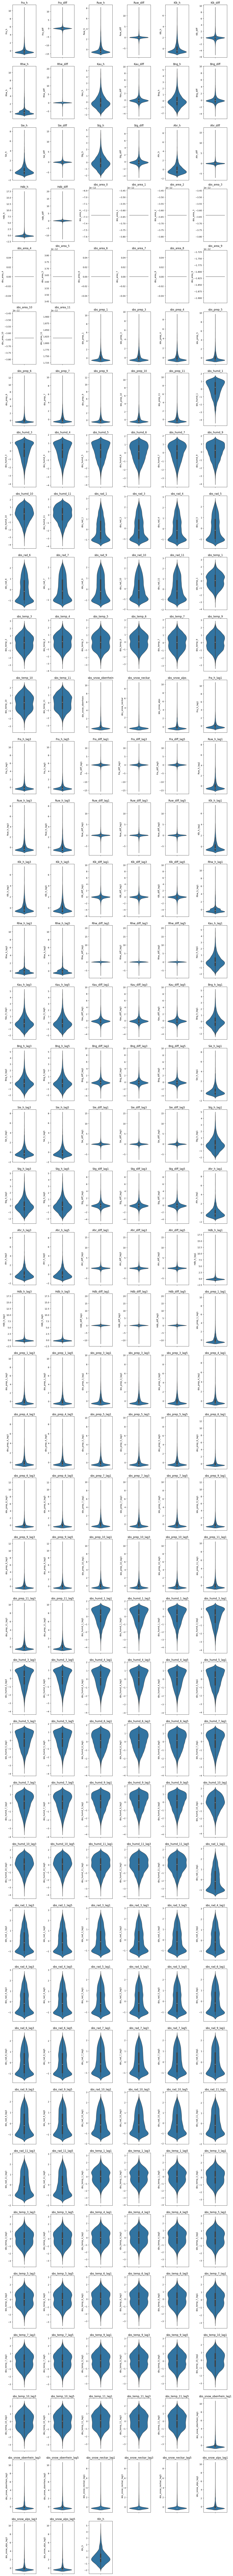

In [25]:
import math
import seaborn as sns
ncols = 6
nrows = math.ceil(len(df_ml.columns) / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*4))

for ax, col in zip(axes.flat, df_ml.columns):
    sns.violinplot(y=df_ml[col], ax=ax)
    ax.set_title(col)

# Hide empty subplots
for ax in axes.flat[len(df_ml.columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

Note that areas are expected to be single values.

## Save all necessary inputs for training

In [26]:
df_ml.to_csv("training_datasets/TRAIN"+str(lead_day)+".csv", index=True)
X_ready.to_csv("training_datasets/Xready"+str(lead_day)+".csv", index=True)
y_ready.to_csv("training_datasets/Yready"+str(lead_day)+".csv", index=True)
y.to_csv("training_datasets/Y"+str(lead_day)+".csv", index=True)

import joblib
# Save to files
joblib.dump(scaler, "scaler_X"+str(lead_day)+".pkl")
joblib.dump(scaler_y, "scaler_y"+str(lead_day)+".pkl")

['scaler_y1.pkl']

In [27]:
from datetime import datetime

now = datetime.now()
print(lead_day)
print(now.strftime("%H:%M"))

1
21:55
